<a href="https://colab.research.google.com/github/Ricardo-Jaramillo/Python-Tensorflow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with Neural Networks in TensorFlow

Predicting a numerical variable based on some other combination of variables, even chorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.13.0


## Creating data to view and fit

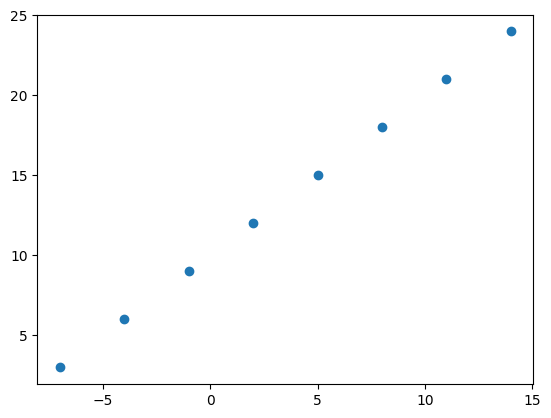

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
X[0].ndim

0

In [8]:
X[0], y[0]

(-7.0, 3.0)

In [9]:
# Turn our NumPy arays into tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

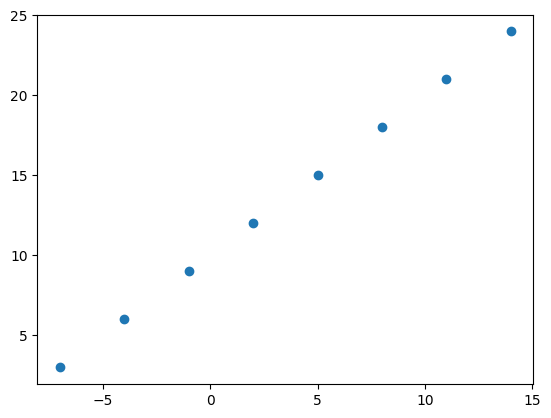

In [11]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)
                             ])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,             # mae -> mean absolute error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])    # sgd -> stochastic gradient descent

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 9.0947 - mae: 9.0947
Epoch 2/5
1/1 [==============================] - 0s 23ms/step - loss: 8.9622 - mae: 8.9622
Epoch 3/5
1/1 [==============================] - 0s 30ms/step - loss: 8.8297 - mae: 8.8297
Epoch 4/5
1/1 [==============================] - 0s 43ms/step - loss: 8.6972 - mae: 8.6972
Epoch 5/5
1/1 [==============================] - 0s 34ms/step - loss: 8.5647 - mae: 8.5647


In [13]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 1s 600ms/step


array([[24.422054]], dtype=float32)

In [15]:
y_pred + 11

array([[35.422054]], dtype=float32)

## Improving the model

We can improve the model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it trainning for longer) or on more data (give the model more examples to learn from)

In [16]:
# Let's rebuild the model

# 1. Create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)
                             ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, -1), y, epochs=500)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 8.3488 - mae: 8.3488
Epoch 2/500
1/1 [==============================] - 0s 26ms/step - loss: 8.2163 - mae: 8.2163
Epoch 3/500
1/1 [==============================] - 0s 29ms/step - loss: 8.0838 - mae: 8.0838
Epoch 4/500
1/1 [==============================] - 0s 42ms/step - loss: 7.9513 - mae: 7.9513
Epoch 5/500
1/1 [==============================] - 0s 19ms/step - loss: 7.8188 - mae: 7.8188
Epoch 6/500
1/1 [==============================] - 0s 28ms/step - loss: 7.6863 - mae: 7.6863
Epoch 7/500
1/1 [==============================] - 0s 20ms/step - loss: 7.5538 - mae: 7.5538
Epoch 8/500
1/1 [==============================] - 0s 18ms/step - loss: 7.4475 - mae: 7.4475
Epoch 9/500
1/1 [==============================] - 0s 31ms/step - loss: 7.4419 - mae: 7.4419
Epoch 10/500
1/1 [==============================] - 0s 30ms/step - loss: 7.4362 - mae: 7.4362
Epoch 11/500
1/1 [==============================] - 0s 33ms/step - loss

In [17]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 118ms/step


array([[30.132471]], dtype=float32)

In [19]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.8458 - mae: 12.8458
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 12.1487 - mae: 12.1487
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 11.4543 - mae: 11.4543
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 10.7596 - mae: 10.7596
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 10.0595 - mae: 10.0595
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 9.3496 - mae: 9.3496
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 8.6268 - mae: 8.6268
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 7.8884 - mae: 7.8884
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.1320 - mae: 7.1320
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 6.8120 - mae: 6.8120
Epoch 11/100
1/1 [==============================] - 0s 12ms/s

In [20]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 117ms/step


array([[27.432775]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

When it comes to evaluations ... there are 3 words you should memorize:

> 'Visualize, Visualize, Visualize

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [22]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

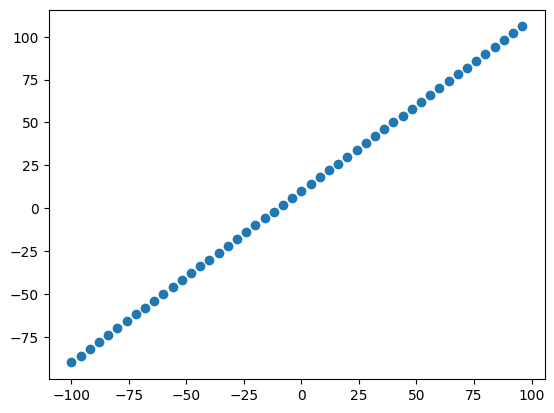

In [24]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets... Split data into training/test set
* **Train set** - the model learns from this data, which is tipically 70 - 80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is tipically 10 - 15%.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is tipically 10 - 15% of the total data available.

In [25]:
# Check the length of how many samples we have
len(X)

50

In [26]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

 ow we've got our data in training and test sets... let's visualize it again!

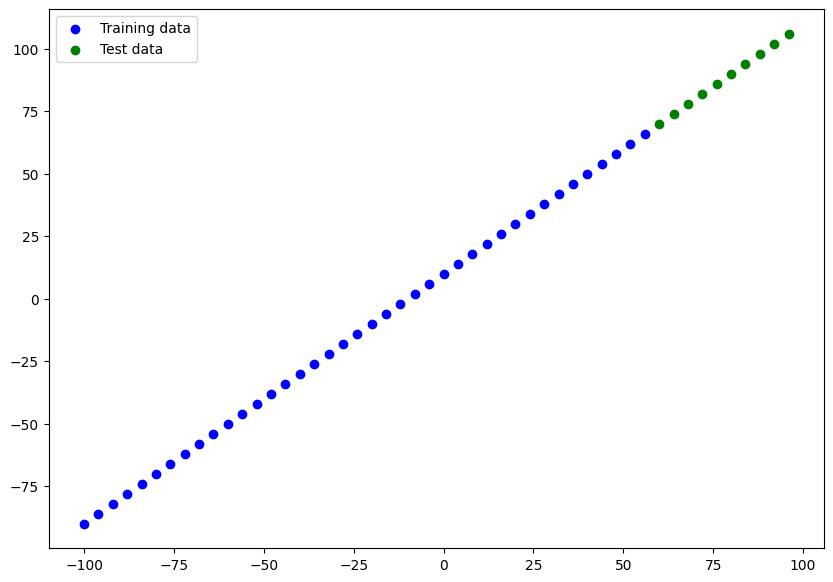

In [27]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Test data')
# Show a legend
plt.legend()

In [28]:
# Let's have look at how to build a neural network for our data

# 1.  Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [29]:
model.summary()

ValueError: ignored

In [30]:
X[0].shape, y[0]

(TensorShape([]), <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [34]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])



In [35]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params . these parameters aren't updated during training (this is typical when you bring in already learn patterns or patameters from other models during **transfer learning**)

In [36]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 49.2774 - mae: 49.2774
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 43.0593 - mae: 43.0593
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 37.0225 - mae: 37.0225
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 30.8083 - mae: 30.8083
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 24.7300 - mae: 24.7300
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 18.7089 - mae: 18.7089
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 12.9565 - mae: 12.9565
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 8.1979 - mae: 8.1979
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 9.2807 - mae: 9.2807
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.9477 - mae: 10.9477
Epoch 11/100
2/2 [==============================] - 0s 8ms/s

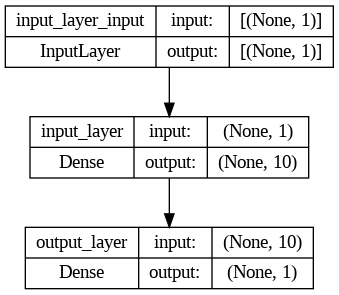

In [37]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test or y_true versus y_pred (ground truth versus your model's predictions).

In [38]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 57ms/step


array([[ 68.8544  ],
       [ 72.78823 ],
       [ 76.72207 ],
       [ 80.6559  ],
       [ 84.58973 ],
       [ 88.52356 ],
       [ 92.45739 ],
       [ 96.39123 ],
       [100.325066],
       [104.258896]], dtype=float32)

In [39]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [40]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
    '''
    Plots training data, test data and compares predictions to ground truth labels.
    '''

    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training data')

    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', label='Test data')

    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c='r', label='Predictions')

    # Show the legend
    plt.legend()

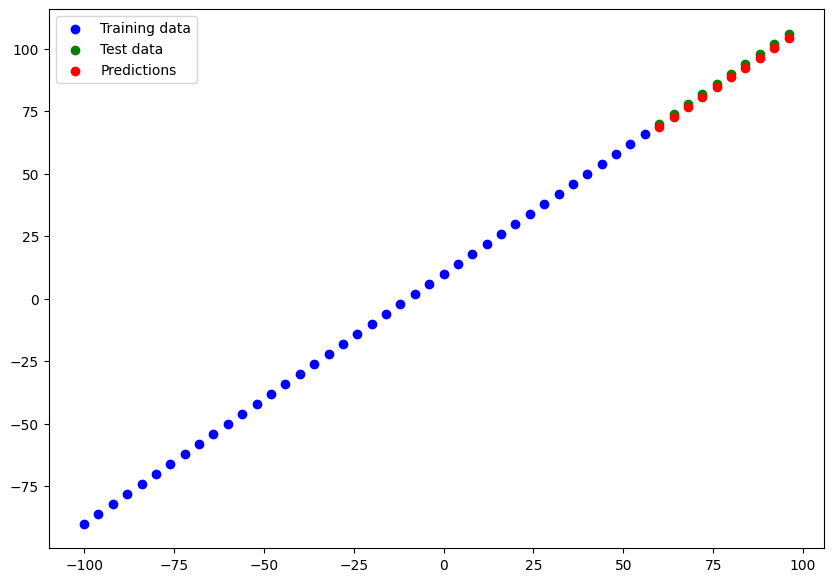

In [41]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics are:
* MAE - mean absolute error, 'on average, how wrong is each of my model's predictions'
* MSE - mean square error, 'square the average errors'

In [42]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 147ms/step - loss: 1.4434 - mae: 1.4434


[1.443352460861206, 1.443352460861206]

In [43]:
y_pred = tf.constant(y_pred)
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 68.8544  ],
       [ 72.78823 ],
       [ 76.72207 ],
       [ 80.6559  ],
       [ 84.58973 ],
       [ 88.52356 ],
       [ 92.45739 ],
       [ 96.39123 ],
       [100.325066],
       [104.258896]], dtype=float32)>

In [44]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [47]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true= y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.4433533>

In [48]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=2.119388>

In [49]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evualuate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more oportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
1. `model_2` - 2 layers, trained for 100 epochs.
1. `model_3` - 3 layers, trained for 500 epochs.

**Build `model_1`**

In [50]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 27.0316 - mae: 27.0316
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 8.6878 - mae: 8.6878
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0094 - mae: 11.0094
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4294 - mae: 9.4294
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 10.3191 - mae: 10.3191
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.5626 - mae: 9.5626
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.6801 - mae: 8.6801
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0476 - mae: 9.0476
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 19.0378 - mae: 19.0378
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2691 - mae: 10.2691
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - l

In [51]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

1/1 [==============================] - 0s 47ms/step


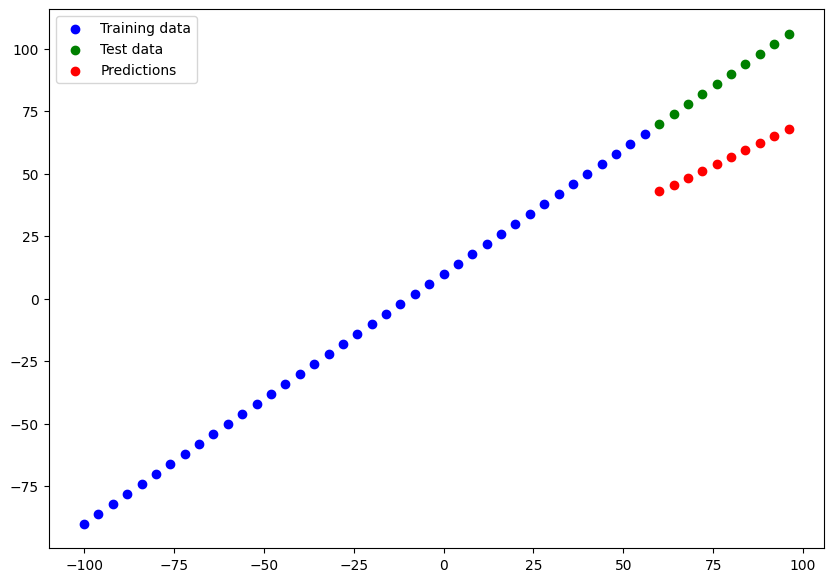

In [52]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [53]:
# Caluculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=32.593895>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1074.7728>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [54]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 65.8086 - mae: 65.8086
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 15.9965 - mae: 15.9965
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 23.7725 - mae: 23.7725
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8972 - mae: 11.8972
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 12.9285 - mae: 12.9285
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 10.4626 - mae: 10.4626
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.3921 - mae: 11.3921
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1299 - mae: 11.1299
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 41.1456 - mae: 41.1456
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 28.4517 - mae: 28.4517
Epoch 11/100
2/2 [==============================] - 0s 8ms

1/1 [==============================] - 0s 54ms/step


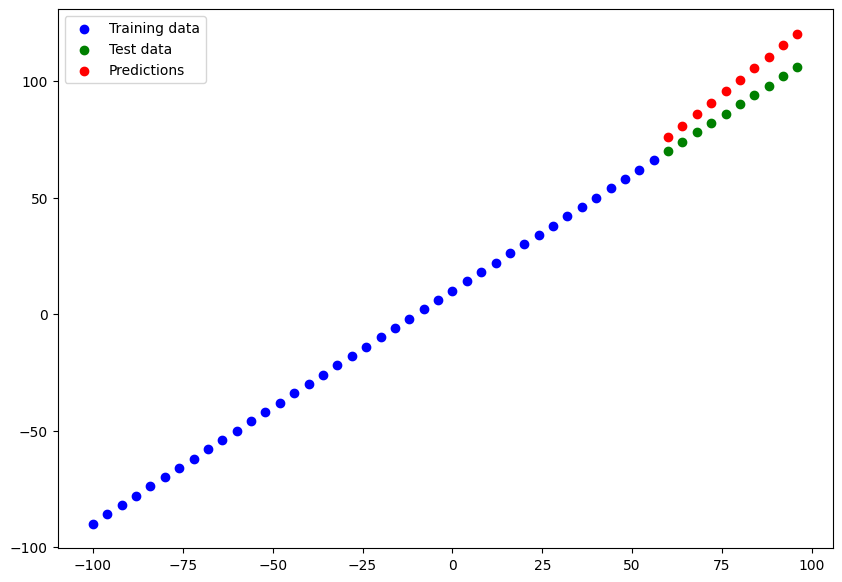

In [55]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [56]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.04883>,
 <tf.Tensor: shape=(), dtype=float32, numpy=108.25327>)

In [57]:
print(mae_1, mae_2)
print(mse_1, mse_2)

tf.Tensor(32.593895, shape=(), dtype=float32) tf.Tensor(10.04883, shape=(), dtype=float32)
tf.Tensor(1074.7728, shape=(), dtype=float32) tf.Tensor(108.25327, shape=(), dtype=float32)


**Build `model_3`**

* 2 layers, trained for 500 epochs

In [58]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, -1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 11ms/step - loss: 43.5288 - mae: 43.5288
Epoch 2/500
2/2 [==============================] - 0s 10ms/step - loss: 29.4520 - mae: 29.4520
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 34.1265 - mae: 34.1265
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 29.2938 - mae: 29.2938
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 15.8535 - mae: 15.8535
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 12.5592 - mae: 12.5592
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.8123 - mae: 11.8123
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 12.8522 - mae: 12.8522
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 33.7154 - mae: 33.7154
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 23.0498 - mae: 23.0498
Epoch 11/500
2/2 [==============================] - 0s 7m

1/1 [==============================] - 0s 53ms/step


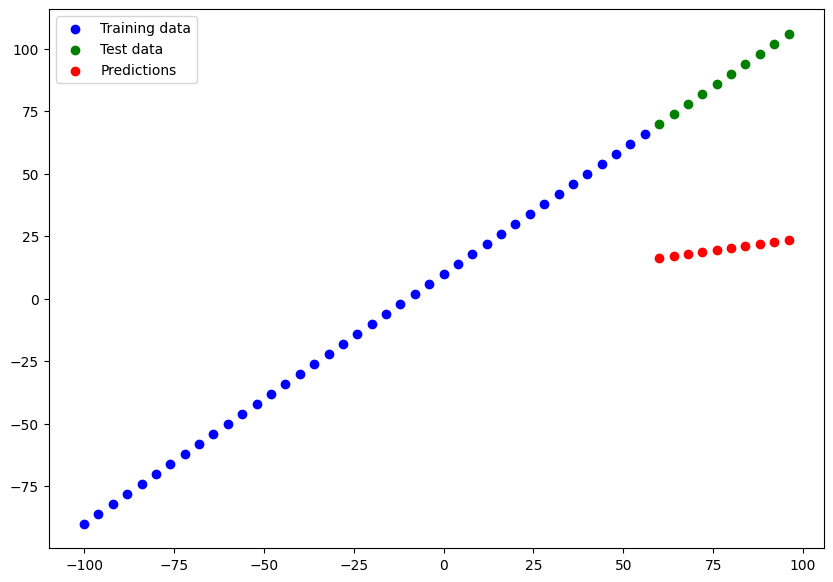

In [59]:
# Make and plot predictions of model_2
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [60]:
# Calculate model_2 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.09387>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4721.5806>)

In [61]:
print(mae_1, mae_2, mae_3)
print(mse_1, mse_2, mse_3)

tf.Tensor(32.593895, shape=(), dtype=float32) tf.Tensor(10.04883, shape=(), dtype=float32) tf.Tensor(68.09387, shape=(), dtype=float32)
tf.Tensor(1074.7728, shape=(), dtype=float32) tf.Tensor(108.25327, shape=(), dtype=float32) tf.Tensor(4721.5806, shape=(), dtype=float32)


**Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when neccesary.

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [62]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [   ['model_1', mae_1.numpy(), mse_1.numpy()],
                    ['model_2', mae_2.numpy(), mse_2.numpy()],
                    ['model_3', mae_3.numpy(), mse_3.numpy()]
                ]
# print(model_results)
all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,32.593895,1074.772827
1,model_2,10.048830,108.253273
2,model_3,68.093872,4721.580566


Looks like `model_2` performed the best...

In [63]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

### Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experimets.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, thre are tools to help us!

**Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modeling experiments
* Weight and Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF format

In [64]:
# Save the model using the SavedModel format
model_2.save('modelSaved_format')

In [66]:
# Save the model using the HDF5 format
model_2.save('HDF5_format.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [68]:
# Check it out
!ls HDF5_format.h5

HDF5_format.h5


## Loading in a saved model

In [69]:
# Loading in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('modelSaved_format')
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 50ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [72]:
# Compare the MAE of model_2_preds and loaded_SavedModel preds
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [73]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model('HDF5_format')
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
# Check to see if loaded .h5 model predictions match model 2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 51ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the 'files' tab and right click on the file you're after and click 'download'
2. Use code (see the cell below)
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [76]:
# Download a file from Google Colab
from google.colab import files
files.download('HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [94]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp 'HDF5_format.h5' '/content/drive/MyDrive/Colab Notebooks/TensorFlow/models'

In [95]:
!ls '/content/drive/MyDrive/Colab Notebooks/TensorFlow/models'

HDF5_format.h5


## A larger example

In [131]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [132]:
insurance['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [133]:
# Let's try one-hote encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [134]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']


In [135]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [136]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [137]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # set random state for reproducible splits
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [138]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8585.2061 - mae: 8585.2061
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7885.9907 - mae: 7885.9907
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7613.0332 - mae: 7613.0332
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7801.4175 - mae: 7801.4175
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7673.3926 - mae: 7673.3926
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7638.8965 - mae: 7638.8965
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7513.6147 - mae: 7513.6147
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7807.7490 - mae: 7807.7490
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7621.4653 - mae: 7621.4653
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7767.3857 - mae: 7767.3857

In [139]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8739.4785 - mae: 8739.4785


[8739.478515625, 8739.478515625]

In [140]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and imporve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longer (200 epochs)
3. (insert your own experiment here)

In [141]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # 100 units
    tf.keras.layers.Dense(10), # 10 units
    tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13270.9766 - mae: 13270.9766
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13065.9492 - mae: 13065.9492
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12652.9463 - mae: 12652.9463
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11874.5928 - mae: 11874.5928
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10630.2061 - mae: 10630.2061
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9143.5449 - mae: 9143.5449
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7911.5298 - mae: 7911.5298
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7452.4102 - mae: 7452.4102
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7393.4692 - mae: 7393.4692
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7374.0713 - mae:

In [142]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 4766.9614 - mae: 4766.9614


[4766.96142578125, 4766.96142578125]

In [143]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8739.4785 - mae: 8739.4785


[8739.478515625, 8739.478515625]

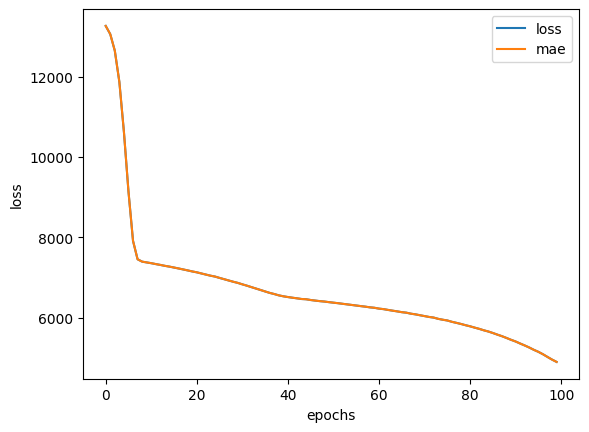

In [144]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

Let's train the same model as above for a little longer. We can do this but calling fit on it again.

In [145]:
# Set random weed
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 4ms/step - loss: 13280.1445 - mae: 13280.1445
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13111.6367 - mae: 13111.6367
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12756.1289 - mae: 12756.1289
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12070.2031 - mae: 12070.2031
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10941.4463 - mae: 10941.4463
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9514.8281 - mae: 9514.8281
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 8198.7354 - mae: 8198.7354
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7545.3716 - mae: 7545.3716
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.7383 - mae: 7429.7383
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.5913 - mae:

In [146]:
# Evaluate our third model
model_3_results = insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3502.8879 - mae: 3502.8879


In [147]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4766.9614 - mae: 4766.9614


[4766.96142578125, 4766.96142578125]

In [148]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8739.4785 - mae: 8739.4785


[8739.478515625, 8739.478515625]

Text(0.5, 0, 'epochs')

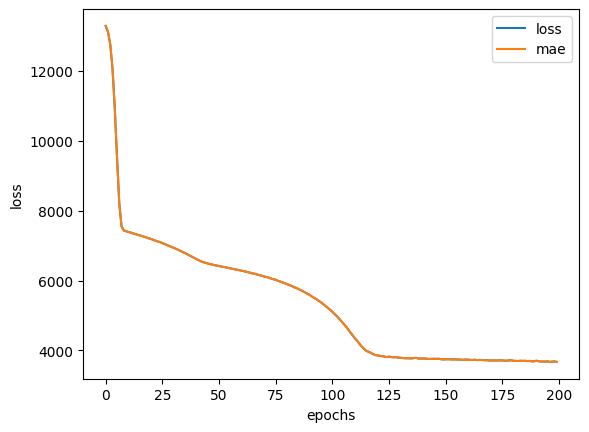

In [149]:
# Plot history (also known as aloss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

**Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the EarlyStopping Callback, which is a TensorFlow component you can add to your model to stop training once it stops improving a certain.

## Preprocessing data (normalization and standarization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:
* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* [**Feature scaling**](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler):
    * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minimum. This is also referred to as min-max scaling.
    * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by subtracting the mean value from the target feature and then dividing it by the standard deviation.
    * Which one should you use?
      * **With neural networks you'll tend to favour normalization** as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

> 📖 **Resource:** For more on preprocessing data, I'd recommend reading the following resources:
* [Scikit-Learn's documentation on preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data).
* [Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02).

We've already turned our data into numbers using `get_dummies()`, let's see how we'd normalize it as well.

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure which to use, you could try both and see which performs better.

<Axes: ylabel='Frequency'>

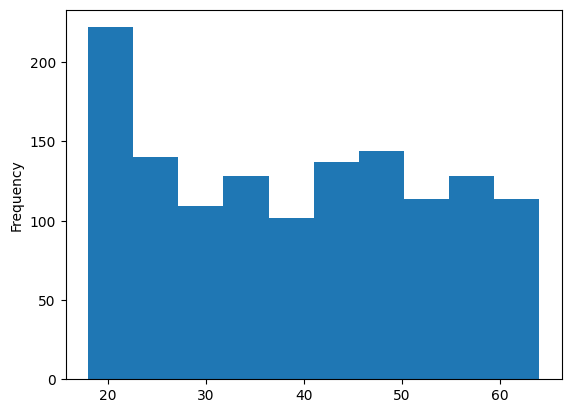

In [150]:
X['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

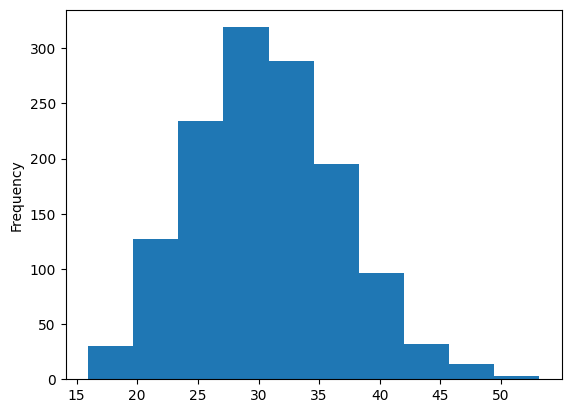

In [151]:
X['bmi'].plot(kind='hist')

In [152]:
X['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

We need to transform the non-numerical columns into numbers.
This time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

We're going to use a few classes from Scikit-Learn:
* [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) - build a multi-step data preprocessing function for the folllowing transformations:
  * [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - make sure all numerical columns are normalized (between 0 and 1).
  * [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) - one hot encode the non-numerical columns.

Let's see them in action.

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as plt

# Read in the insurance dataframe
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [154]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X & y
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [155]:
# What does our data look like?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [156]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [157]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [158]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10)
    ,tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13344.0830 - mae: 13344.0830
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13337.2744 - mae: 13337.2744
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13320.3145 - mae: 13320.3145
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13283.1973 - mae: 13283.1973
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13214.5195 - mae: 13214.5195
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13102.5781 - mae: 13102.5781
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12936.6670 - mae: 12936.6670
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12706.4619 - mae: 12706.4619
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12401.6133 - mae: 12401.6133
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 12015.55

In [159]:
# Evaluate our insurance model trained no normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3442.5203 - mae: 3442.5203


[3442.520263671875, 3442.520263671875]

In [161]:
# Insurance model 3 results
model_3_results

[3502.887939453125, 3502.887939453125]

## 🛠 Exercises

We've a covered a whole lot pretty quickly.

So now it's time to have a **play around** with a few things and start to build up your intuition.

I emphasise the words play around because that's very important. Try a few things out, run the code and see what happens.

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  * Building a larger model (how does one with 4 dense layers go?).
  * Increasing the number of units in each layer.
  * Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
  * What happens if you train for longer (say 300 epochs instead of 200)?
4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.


## 📖 Extra curriculum

If you're looking for extra materials relating to this notebook, I'd check out the following:

* [MIT introduction deep learning lecture 1](https://youtu.be/njKP3FqW3Sk) - gives a great overview of what's happening behind all of the code we're running.
* Reading: 1-hour of [Chapter 1 of Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap1.html) by Michael Nielson - a great in-depth and hands-on example of the intuition behind neural networks.

To practice your regression modelling with TensorFlow, I'd also encourage you to look through [Lion Bridge's collection of datasets](https://lionbridge.ai/datasets/) or [Kaggle's datasets](https://www.kaggle.com/data), find a regression dataset which sparks your interest and try to model.